In [ ]:
import fastai
fastai.__version__
!pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 727kB 18.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 1.2MB 34.2MB/s 
     |████████████████████████████████| 194kB 52.3MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 206kB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np
from google.colab import files, drive
import io
import os

%matplotlib inline
import torch
import glob
import pathlib
import matplotlib.pyplot as plt
from fastai.imports import *

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/'

/content/drive/MyDrive


## Modeling:

In [ ]:
PATH = pathlib.PosixPath("/content/drive/MyDrive/asl_alphabet_train")
sz=224

In [ ]:
fnames = get_image_files(PATH)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(PATH, fnames, label_func, valid_pct=0.2,
                                      item_tfms=Resize(200), batch_tfms=Normalize.from_stats(*imagenet_stats))

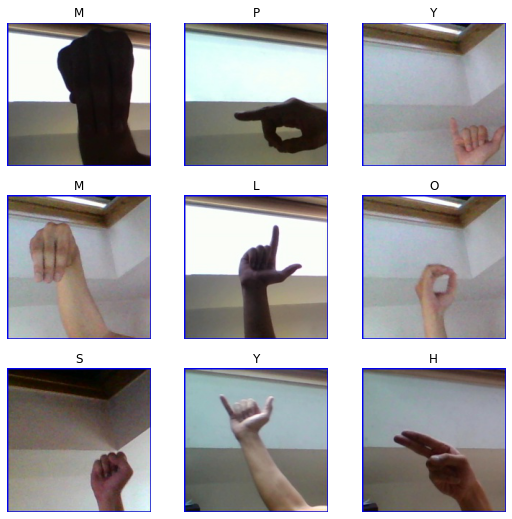

In [ ]:
dls.show_batch()

In [ ]:
resnet_model = models.resnet50(pretrained=True)
def get_learner(m):
    return Learner(dls, m, metrics=[error_rate,accuracy])

learn = get_learner(resnet_model)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.0003981071640737355)

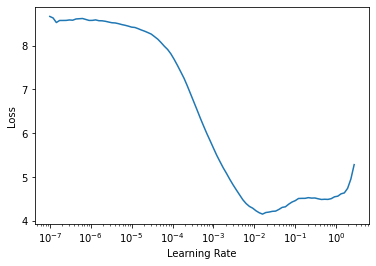

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.077404,0.171081,0.046284,0.953716,2:39:22
1,0.001674,0.000877,0.000229,0.999771,13:49
2,0.000082,0.000242,0.000115,0.999885,13:49


In [ ]:
learn.save('stage-1b')

Path('/content/drive/MyDrive/asl_alphabet_train/models/stage-1.pth')

## Result Analysis

In [ ]:
interp = ClassificationInterpretationtion.from_learner(learn)

NameError: ignored

In [ ]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
learn.export('exported_model') # exporting the model, called 'export.pkl'

## Topic Visualization

In [ ]:
labels_name

NameError: ignored

In [ ]:
labels_name = []
for i in files:
    labels_name.append('Class: '+ i)
labels_name.remove('Class: models')

TypeError: ignored

In [ ]:
def plots(ims, figsize=(12,6), rows=3, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows+1, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [ ]:
imgs = []
for i in files:
    file = os.listdir(PATH + '/'+ i)
    try:
      img = plt.imread(PATH + '/' + i + '/' + file[0])
    except:
      continue
    imgs.append(img)

plots(imgs, titles=labels_name, rows=4, figsize=(16,15))

TypeError: ignored

## Open CV

In [ ]:
# using models to make predictions on individual new images
export_model = PATH + '/export.pkl'
learn_inf = load_learner(export_model)

In [ ]:
# !pip3 install opencv-python
from scipy.spatial import *
import numpy as np
import cv2
from imutils import face_utils
from imutils.video import VideoStream
from fastai.vision import *
import imutils
import argparse
import time
import dlib

In [ ]:
vidcap = cv2.VideoCapture('/Users/ruffner/Documents/Texas Files/Cognitive Computing/Project/ABC_cog_comp_proj.mp4')
success,image = vidcap.read()
count = 0
while success:
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    
    prediction, idx, probability = learn_inf.predict(image)
    count += 1